<a href="https://colab.research.google.com/github/fightmeat/Machine_Leaning/blob/main/14_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터(Data)
1. 통계분석은 데이터를 다루는 것이므로 데이터에서 본질적인 의미를 찾는다.
2. 변수의 종류
- 질적 변수 : 2진 변수라고도 부른다. 남성과 여성, 흡연 여부 등 값이 2개뿐인 변수로 명의 척도와 순서 척도가 있다.
- 양적 변수 : 양을 표현하는 변수, 간격 척도와 비례 척도가 있다.
- 이산형 변수 : 0,1,2... 와 같이 하나하나의 값을 취하는 변수로 서로 인접한 숫자 사이에 값이 존재하지 않는다.
- 연속형 변수 : 연속적인 값을 취할 수 있는 변수로 어떤 숫자 사이에도 반드시 숫자가 존재한다.

In [74]:
import numpy as np
import pandas as pd

- 매직 명령어(Magic Command) : IPython(Jupyter notebook) 시스템에서 제공하는 add_function
- 접두사 %의 경우 : 한 줄의 코드에서만 실행
- 접두사 %%의 경우 : 여러 줄, 즉 한 셀의 내용 전체를 실행

In [ ]:
%%writefile sport_test.csv
학생번호,학년,악력,윗몸일으키기,점수,순위
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8
10,3,47.4,32,16,3

Writing sport_test.csv


In [ ]:
# index_col : 인덱스로 사용할 컬럼명
df = pd.read_csv('sport_test.csv', index_col='학생번호')

In [ ]:
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [ ]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

# 데이터의 크기
- DataFrame의 크기는 shape

In [ ]:
df.shape

(10, 5)

# 기초 통계 분석
- 데이터의 특징을 파악하는 방법에는 크게 두 가지가 있다.
- 하나는 평균이나 분산등의 수치지표에 따라 데이터를 요약하는 방법이고,
- 다른 하나는 그래프를 이용하여 시각화를 통해 데이터를 분석하는 방법이다.

In [105]:
# 출력된 소수점자리수를 제한하는 매직명령어
%precision 0
# DataFrame의 출력될 값의 소숫점이하 3자리로 제한
# pd.set_option('precision', 3)

'%.0f'

In [ ]:
# numpy를 통해 소숫점 자릿수를 제한
np.set_printoptions(precision=3)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# numpy 실수 출력을 설정
np.set_printoptions(formatter={'float_kind':lambda x:"{0:0.3f}".format(x)})

In [ ]:
%%writefile scores_em.csv
student_number,english,mathematics
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76

Writing scores_em.csv


In [ ]:
df2 = pd.read_csv('scores_em.csv', index_col='student_number')
df2

,english,mathematics
student_number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
scores = np.array(df2['english'])
scores

array([42, 69, 56, 41, 57])

In [ ]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A','B','C','D','E']))
scores_df

,score
A,42
B,69
C,56
D,41
E,57


## 평균값(mean) : 가장 일반적으로 사용되는 대푯값

In [ ]:
sum(scores)/len(scores)

53.0

In [ ]:
scores.mean()

53.0

In [ ]:
np.mean(scores)

53.0

In [ ]:
# DataFrame, Series객체에서 mean() 사용
scores_df.mean()

score   53.000
dtype: float64

In [ ]:
scores_df['score'].mean() # 시리즈도 mean함수를 쓸수있다.

53.0

# 중앙값(median) : 데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값

In [ ]:
sorted_df = np.sort(df['윗몸일으키기'])
sorted_df

array([14, 20, 27, 27, 28, 31, 32, 32, 34, 37])

In [ ]:
# 중앙값을 구현하는 함수 정의
n = len(sorted_df)
if n % 2 == 0:
  m0 = sorted_df[n // 2 - 1]
  m1 = sorted_df[n // 2]
  median = (m0 + m1)/2

else:
  median = sorted_df[(n+1)//2 -1]

print(median)

29.5


In [ ]:
#numpy
np.median(sorted_df)

29.5

In [ ]:
# DataFrame, Seriees : 객체명.median()
df['윗몸일으키기'].median()

29.5

## 최빈값(mode) : 데이터에서 가장 많이 나타나는 값
- 기본적으로 질적 데이터(범주형 데이터)의 대푯값을 구할 때 사용하는 지표

In [ ]:
pd.Series([1,1,1,2,2,3,3,3,3,3,3]).mode()

0    3
dtype: int64

## 편차 (deviation): 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표

In [ ]:
mean = np.mean(scores)
mean

53.0

In [ ]:
deviation = scores - mean
deviation

array([-11.000, 16.000, 3.000, -12.000, 4.000])

In [ ]:
np.mean(deviation ** 2)

109.2

In [ ]:
np.var(scores)

109.2

In [ ]:
df2['english'].var()

136.5

- 분산에는 표본분산과 불편분산의 두 종류가 있다.
- Numpy는 표본분산을 기본 분산으로 사용
- Pandas는 불편분산을 기본 분산으로 사용
- 국내 통계학에서는 불편분산을 기본 분산으로 채택

# 표준편차(standard devation) : 분산에 제곱근을 취한 값

In [ ]:
np.sqrt(np.var(scores, ddof=0))

10.449880382090505

In [ ]:
np.std(scores, ddof=0)

10.449880382090505

## 범위(range) : 데이터의 최대값과 최소값만으로 산포도를 표현하는 방법
- 분산이나 표준편차와 달리 데이터 전체를 보는 것은 아니다.
- 최대값과 최소값의 차이가 크면 산포도가 크기, 그 차이가 작으면 산포도도 작다는 의미
- 이상치가 있을경우 대푯값으로 사용할 수 있다.

In [ ]:
np.max(scores) - np.min(scores)

28

# 사분위수
- 전체 데이터의 분포를 파악할 때 사용된다.

In [ ]:
pd.Series(scores).describe()

count    5.000
mean    53.000
std     11.683
min     41.000
25%     42.000
50%     56.000
75%     57.000
max     69.000
dtype: float64

In [ ]:
q1 = np.percentile(scores, 25)
q3 = np.percentile(scores, 75)
iqr = q3 - q1
iqr

15.0

# 데이터 전처리 : Feature Scaling(피처 스케일링)
- 서로 다른 변수의 값들의 범위를 일정한 수준으로 맞추는 작업
1. 표준화(StandardScalar)
  - 평균이 0이고, 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
  - z-value라는 표현을 사용
    z = (x - mean())/std()

2. 정규화(Normalization)
  - 일반적으로 정규화라는 것은 서로 다른 값들을 통일하기 위해 변환
  - MinMaxScaler : 데이터의 값을 0과 1 사이의 값으로 변환
    단, 음수값이 있으면 -1에서 1사이의 값으로 변환하는 것

3. 범주형 데이터(문자) => 정형화를 하기위해
  - One-Hot encoding(원-핫 인코딩) : 문자값을 0과 1의 값으로 변환

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
scaler = StandardScaler()
iris = load_iris()
print(iris)
# iris.info() # info는 데이터프레임에서만 동작한다.

In [76]:
# 데이터프레임(DataFrame) : data, index, columns

In [ ]:
iris.data

In [78]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
iris_df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [80]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [81]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [82]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [130]:
# iris 모든 컬럼(피처) 값이 평균 0에 아주 가까운 값으로, 분산은 1에 가까운 값으로 변환
scaler.fit(iris_df) # 학습
iris_sc = scaler.transform(iris_df)
iris.sc = pd.DataFrame(data=iris_sc, columns=iris.feature_names)

AttributeError: ignored

In [85]:
iris_sc.head()

AttributeError: ignored

In [ ]:
iris_sc.mean()

-1.4684549872375404e-15

In [ ]:
iris_sc.var()

1.0

In [92]:
from sklearn.preprocessisng import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_mms = scaler.transform(iris_df)
iris_mms = pd.DataFrame(data=iris_mms, columns = iris.feature_names)
iris_mms.head()

ModuleNotFoundError: ignored

In [90]:
iris_mms.min()

NameError: ignored

In [91]:
iris_mms.max()

NameError: ignored

In [93]:
# fit_transform()
# fit/ predict

In [94]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [95]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [97]:
z_value = (iris['sepal_length'] - np.mean(iris['sepal_length']))/ np.std(iris['sepal_length'])
z_value

0     -0.901
1     -1.143
2     -1.385
3     -1.507
4     -1.022
       ...  
145    1.038
146    0.553
147    0.796
148    0.432
149    0.069
Name: sepal_length, Length: 150, dtype: float64

# 데이터 인코딩
- 레이블 인코딩(Label Encoding)
- 원-핫 인코딩(One-Hot Encoding)

In [99]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','선풍기','에어프라이기','에어프라이기']

lbe.fit(items)
item_lbe = lbe.transform(items)
print(item_lbe)

[0 1 4 5 2 2 2 3 3]


- OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형으로 변환되어야 한다.
- 입력값으로 2차원 데이터가 필요하다.

In [106]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
item_lbe= item_lbe.reshape(-1,1) # 이러면 1차원이 2차원이 된다.
ohe.fit(item_lbe)
item_ohe = ohe.transform(item_lbe)
print(item_ohe.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [107]:
picher = pd.read_csv('picher_stats_2017.csv')
batter = pd.read_csv('batter_stats_2017.csv')

In [108]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [116]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.000,...,0.760,0.342,73.700,3.600,6.910,3.690,3.440,6.620,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.100,...,0.530,0.319,67.100,3.880,6.800,3.520,3.410,6.080,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.100,...,0.790,0.332,72.100,3.440,6.540,3.940,3.820,5.640,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.200,...,1.020,0.298,75.000,3.430,6.110,4.200,4.030,4.630,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.100,...,0.910,0.323,74.100,3.800,6.130,4.360,4.310,4.380,111000,85000


In [110]:
picher.shape # 22개의 열

(152, 22)

In [111]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [112]:
picher['연봉(2018)'].describe()

count      152.000
mean     18932.237
std      30940.733
min       2700.000
25%       4000.000
50%       7550.000
75%      18500.000
max     230000.000
Name: 연봉(2018), dtype: float64

<Axes: >

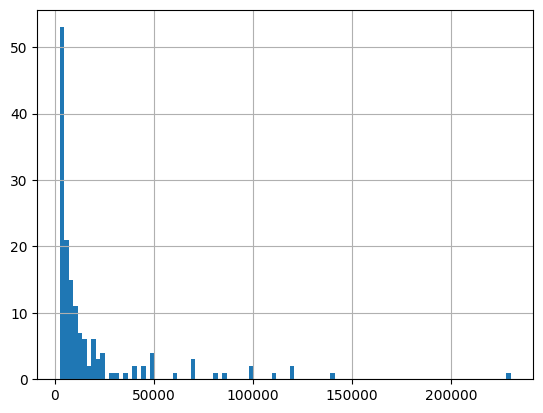

In [114]:
picher['연봉(2018)'].hist(bins=100)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


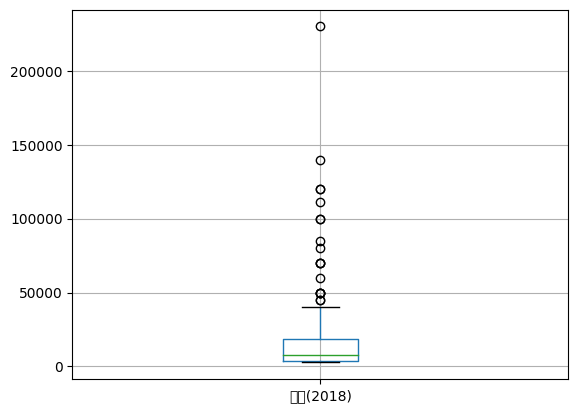

In [115]:
picher.boxplot(['연봉(2018)'])

In [117]:
# 피처 스케일링을 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

In [119]:
# 피처 각각에 대한 scaling을 수행하기 위해 함수 정의
def standard_scaling(df,scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/series_std)
    return df

In [121]:
picher_df = standard_scaling(picher, scale_columns)
picher_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.314,1.227,-0.306,-0.586,-0.544,0.059,2.452,2.645,...,-0.442,0.017,0.447,-0.587,3.175,-0.971,-1.058,4.503,140000,2.735
1,소사,LG,2.020,2.505,-0.099,-0.586,-0.544,0.059,2.350,2.548,...,-0.669,-0.242,-0.123,-0.520,3.115,-1.062,-1.073,4.095,120000,1.337
2,양현종,KIA,4.349,0.908,-0.306,-0.586,-0.544,0.111,2.555,2.707,...,-0.413,-0.096,0.309,-0.625,2.974,-0.837,-0.866,3.762,230000,5.330
3,차우찬,LG,1.761,1.227,-0.306,-0.586,-0.544,-0.044,2.247,2.351,...,-0.187,-0.478,0.559,-0.628,2.741,-0.698,-0.760,2.998,100000,3.334
4,레일리,롯데,2.537,1.227,-0.306,-0.586,-0.544,0.059,2.452,2.588,...,-0.295,-0.197,0.481,-0.539,2.752,-0.613,-0.619,2.809,111000,2.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.310,0.588,-0.306,-0.586,0.680,0.214,-0.112,0.104,...,0.364,0.163,-1.003,0.411,-1.230,0.376,0.476,-0.859,7100,-0.336
148,정용운,KIA,-0.051,-0.370,-0.306,-0.586,-0.544,-0.199,0.503,0.043,...,-0.147,-0.871,-0.269,-0.030,-0.362,0.483,0.622,-0.874,7500,-0.535
149,노경은,롯데,-0.828,-0.370,-0.306,-0.586,-0.544,-1.025,-0.420,-0.850,...,1.219,0.466,-1.356,1.347,-1.023,1.349,1.389,-0.965,10000,-0.020
150,김승현,삼성,-0.828,-0.050,-0.306,-0.364,-0.544,0.627,-0.625,-0.273,...,0.226,0.006,0.464,-0.066,-0.790,0.729,0.713,-1.033,4000,-0.543


In [122]:
# 팀명의 피처를 One-Hot Encoding
team_encoding = pd.get_dummies(picher_df['팀명'])
team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [123]:
picher_df = picher_df.drop('팀명',axis=1)

In [125]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,3.314,1.227,-0.306,-0.586,-0.544,0.059,2.452,2.645,0.672,...,-0.442,0.017,0.447,-0.587,3.175,-0.971,-1.058,4.503,140000,2.735
1,소사,2.020,2.505,-0.099,-0.586,-0.544,0.059,2.350,2.548,0.135,...,-0.669,-0.242,-0.123,-0.520,3.115,-1.062,-1.073,4.095,120000,1.337
2,양현종,4.349,0.908,-0.306,-0.586,-0.544,0.111,2.555,2.707,0.110,...,-0.413,-0.096,0.309,-0.625,2.974,-0.837,-0.866,3.762,230000,5.330
3,차우찬,1.761,1.227,-0.306,-0.586,-0.544,-0.044,2.247,2.351,0.350,...,-0.187,-0.478,0.559,-0.628,2.741,-0.698,-0.760,2.998,100000,3.334
4,레일리,2.537,1.227,-0.306,-0.586,-0.544,0.059,2.452,2.588,0.156,...,-0.295,-0.197,0.481,-0.539,2.752,-0.613,-0.619,2.809,111000,2.735


In [126]:
picher_df = picher_df.join(team_encoding)

In [127]:
picher_df

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.314,1.227,-0.306,-0.586,-0.544,0.059,2.452,2.645,0.672,...,2.735,0,0,0,0,1,0,0,0,0
1,소사,2.020,2.505,-0.099,-0.586,-0.544,0.059,2.350,2.548,0.135,...,1.337,0,0,1,0,0,0,0,0,0
2,양현종,4.349,0.908,-0.306,-0.586,-0.544,0.111,2.555,2.707,0.110,...,5.330,1,0,0,0,0,0,0,0,0
3,차우찬,1.761,1.227,-0.306,-0.586,-0.544,-0.044,2.247,2.351,0.350,...,3.334,0,0,1,0,0,0,0,0,0
4,레일리,2.537,1.227,-0.306,-0.586,-0.544,0.059,2.452,2.588,0.156,...,2.735,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,-0.310,0.588,-0.306,-0.586,0.680,0.214,-0.112,0.104,-0.969,...,-0.336,0,0,0,0,0,0,0,0,1
148,정용운,-0.051,-0.370,-0.306,-0.586,-0.544,-0.199,0.503,0.043,-0.778,...,-0.535,1,0,0,0,0,0,0,0,0
149,노경은,-0.828,-0.370,-0.306,-0.586,-0.544,-1.025,-0.420,-0.850,-0.757,...,-0.020,0,0,0,0,0,0,1,0,0
150,김승현,-0.828,-0.050,-0.306,-0.364,-0.544,0.627,-0.625,-0.273,0.205,...,-0.543,0,0,0,0,0,0,0,1,0
